<a href="https://colab.research.google.com/github/OrenShaya/image_process1/blob/main/Pre_course_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pre-course Assignment

Your task for this assignment is to create a Python script in this notebook to process the famous image of Mona Lisa.

The goal is to detect her face with a rectangular outline, preserving color inside her face and converting the surroundings to grayscale using erosion and dilation for noise reduction.

You will showcast your proficiency in python by using popular libraries like OpenCV, NumPy, and Matplotlib. You might explore several new functions in OpenCV.

The solution to the assignment should be documented in this notebook and conclude with three images, similar to those we received from a different iamge, by Van Gogh.

At the end, download this notebook an **ipynb** file and send us together with a 3 subplots figure file (2 files in total).

If you are not familiar with Google Colab, please consider to visit here and read more: https://colab.research.google.com/?utm_source=scs-index

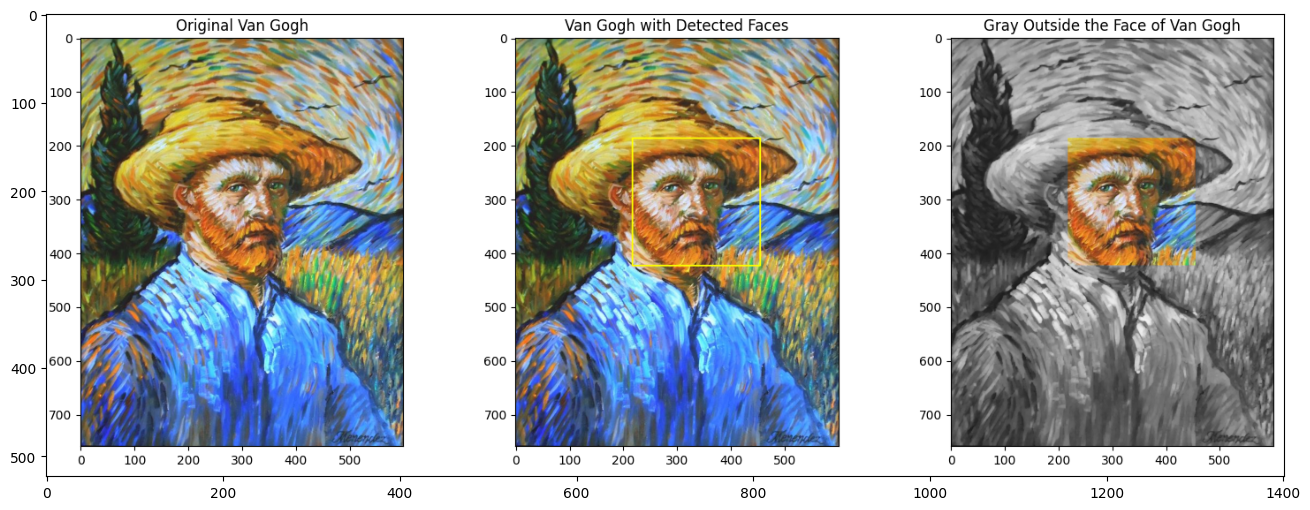

In [2]:
# Import libraries
import cv2
import matplotlib.pyplot as plt
image = cv2.imread('Van Gogh.png')
plt.figure(figsize=(18, 6))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))



---



1. Import the OpenCV, Numpy, and Matplotlib.





In [137]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

2. Upload the image "mona.jpg" using the "Files" option on the left bar.

3. Use the imread function from the OpenCV library to load the image file "mona.jpg".



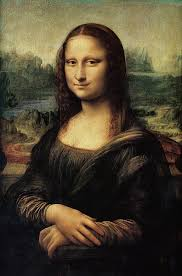

In [138]:
image = cv2.imread("/content/mona.jpg")
original = image.copy()
cv2_imshow(image)

4. Utilize the color Space Conversion (cvtColor) function from the OpenCV library to convert the image to grayscale.You can read about the cvtColor function, [here](https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html). You may use the function COLOR_BGR2GRAY, also from OpenCV.

In [139]:
gray_color = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

5. Write a function for detecting the face of Mona Lisa using the Haar algoritm Cascades from OpenCV ([read more](https://pyimagesearch.com/2021/04/12/opencv-haar-cascades/)). The function gets the image and outputs the image with a rectangles around the detected face, and the face. You may use the cv2.CascadeClassifier, face_cascade.detectMultiScale, and the cv2.rectangle (draw the rectengular [read more](https://www.geeksforgeeks.org/python-opencv-cv2-rectangle-method/)).

In [140]:
def detect_face(I, color):
  detector = cv2.CascadeClassifier("/content/haarcascade_frontalface_default.xml")

  face = detector.detectMultiScale(color, 1.1, 1)
  for (x, y, w, h) in face:             # yellow
    cv2.rectangle(I, (x, y), (x+w, y+h), (0,255,255), 2)
  return I, face

6. Call the function to detect the face in the image

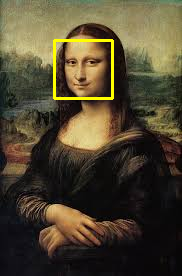

In [141]:
image_face_detected, face = detect_face(image, gray_color)
cv2_imshow(image_face_detected)

7. Apply bluring on the gray image

8. Convert grayscale image to 3-channel image

In [144]:
gray_image = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)

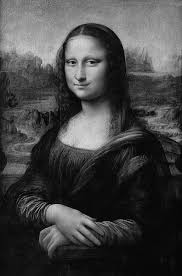

In [150]:
gray_image = cv2.merge((gray_image,gray_image,gray_image))
cv2_imshow(gray_image)

9. Create a mask of the face region and change color to grayscale outside the face region

Create the mask

In [145]:
face

array([[54, 40, 58, 58]], dtype=int32)

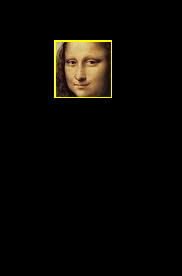

In [151]:
x = face[0][0]
y = face[0][1]
w = face[0][2]
h = face[0][3]

mask = np.zeros(image.shape[:2],np.uint8)
mask[y:y+h,x:x+w] = 255
masked_face = cv2.bitwise_and(image, image, mask = mask)

cv2_imshow(masked_face)

Creating grayscale of the original

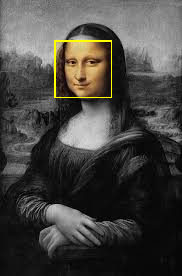

In [156]:
# Cut the face region from the colored face image
colored_face_region = masked_face[y:y+h, x:x+w]
# Resize the extracted face region to match the dimensions of the grayscale face region
colored_face_resized = cv2.resize(colored_face_region, (w, h))
# Convert the colored face region to grayscale
colored_face_resized_gray = cv2.cvtColor(colored_face_resized, cv2.COLOR_BGR2GRAY)
# Replace the grayscale face region in the original grayscale image with the colored face region
gray_image[y:y+h, x:x+w] = colored_face_resized

cv2_imshow(gray_image)

10. Show 3 subplots figures: original, Mona Lisa with detected face, and gray outside the face of Mona Lisa. Each figure size is 18x6.

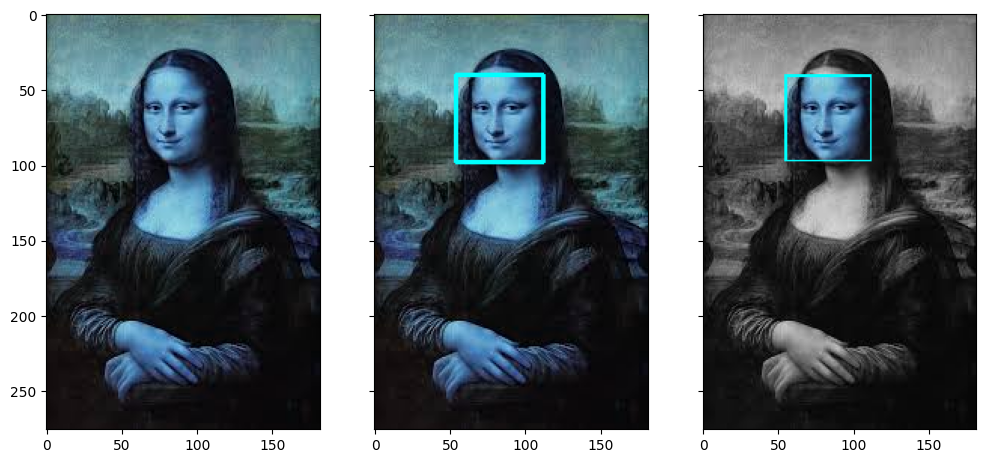

In [165]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, sharex=True, figsize=(12, 6))
ax1.imshow(original)
ax2.imshow(image_face_detected)
ax3.imshow(gray_image)